# 数据预处理

数据的质量涉及多个方面，包括准确性、完整性、一致性、时效性、可解释性等。在真实数据中，往往包含了大量缺失值，噪声，以及人为因素导致的误差或异常点；数据的质量，决定了模型预测和泛化能力的上限。
本章实验分别使用不同的方法进行数据预处理。

In [208]:
#导入相关库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# 数据集与任务介绍
本次实验使用的数据集是google store中，各个app下载的信息。共10841个样本，每个样本13个特征。

实验任务介绍：本次实验我们将利用app的类型（Category）、收费情况(Type)、大小（Size）、评分(Rating)、评价数量(Reviews)和分级(Content Rating)等特征来预测APP的下载量。

# 实验介绍及步骤

    实验介绍：本次实验我们将会对数据集进行相应的预处理工作，因为数据预处理的步骤相对灵活。我们会针对不同特征运用不同的预处理方法。这一个小节的实验，我们将处理一个特征维度的数据，以带领大家学习数据处理的基本语法。掌握了这些基本语法后，大家需要通过代码填空的方式自己动手实践处理数据。
    
    实验步骤：首先我们将对整理数据集进行缺失值处理，接下来我们将以Rating、Size和Price这两特征为例，进行数据预处理的教学。

# 一、数据预处理

## 1.1 数据读取

In [209]:
raw_df = pd.read_csv(r"googleappstorev1.csv",index_col=0)#读取数据。index_col=0：读取时不自动添加行号。
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


## 1.2 缺失值处理

**1.2.1 查看缺失值**

**pandas中，isnull()是常用的缺失值查看方法：**

    df.isnull():查看所有数据是否为缺失值，返回bool值。True：缺失值；False：不是缺失值。
    df.isnull().any():查看每个特征是否存在缺失值，返回bool值。
    df.isnll().sum():返回每个特征中缺失值的具体数量。

In [210]:
# 查看前5个样本中，数据是否为缺失值。
raw_df.head().isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [211]:
# 查看每个特征是否存在缺失值
raw_df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
dtype: bool

In [212]:
raw_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

### 问题1：在介绍完三种查看缺失值的方法后，对于本次任务来说，哪种方法更加合适呢？

**1.2.2 缺失值处理**

缺失值处理的常见方法有：

    1.删除：dropna();
    2.填充：填充包括统计量填充（众数、均值、中位数）、KNN填充和回归预测填充等。常用方法包括：fillna()与Python的sklearn.preprocessing库中的Imputer类可对缺失值进行众数、均值、中位数填充。
    3.不处理

### 问题2：对于本次实验的数据集和任务，应该对于缺失值进行删除还是填充操作呢？


#### 1.2.2.1 缺失值填充

#### 方法1：统计量填充

本次实验我们选择统计量填充方法。统计量填充的选择标准：

    对于连续值，推荐使用中位数 ，可以排除一些特别大或者特别小的异常值造成的影响；
    对于离散值，推荐使用众数，均值和中位数没有意义，不能使用。

### 问题3：对于评分，我们应该哪种统计量填充方法呢？



使用Python中pandas库的dropna ( ) 函数，其基本格式如下：

    DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None)

    关键参数详解：
    value: 特定填充值
    method: 差值方式：
        pad/ffill：用前一个非缺失值去填充该缺失值
        backfill/bfill：用下一个非缺失值填充该缺失值
        None：指定一个值去替换缺失值（缺省默认这种方式）
    axis: 默认为0。axis=0代表d对行数据进行操作，axis=1代表列数据
    inplace=True/False：Boolean数据, 默认为False。inplace=True代表直接对原数据集N做出修改。
    limit : 阈值。超过阈值才填充该行或该列。 

In [213]:
#将样本按照分类类别进行分组，求出每类中评分的中位数，再填充缺失值。
raw_df["Rating"] = raw_df["Rating"].fillna(raw_df["Rating"].median())
raw_df["Rating"]

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [214]:
#查看
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


#### 1.2.2.2 缺失值删除

使用Python中pandas库的dropna ( ) 函数，其基本格式如下：

    DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

    关键参数详解：
    axis=0/1，默认为0。axis=0代表d对行数据进行操作，axis=1代表列数据。
    how=any/all，默认为any。how=any代表若某行或某列中存在缺失值，则删除该行或该列。
    how=all:若某行或某列中数值全部为空，则删除该行或该列。
    thresh=N，可选参数，代表若某行或某列中至少含有N个缺失值，则删除该行或该列。
    subset=列名，可选参数，代表若指定列中有缺失值，则删除该行。
    inplace=True/False，Boolean数据, 默认为False。inplace=True代表直接对原数据集N做出修改。
    inplace=False代表修改后生成新数据集M，原数据集N保持不变。

In [215]:
#删除新数据集的所有缺失值
non_na_df = raw_df.dropna()
non_na_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


In [216]:
#检查数据集中是否含有缺失值
non_na_df.isnull().any()#当删除掉不需要的行时，行索引会变的不连续，这时候可以重新设计新的索引
non_na_df.reset_index(drop=True,inplace=True)#drop=True：删除原行索引；inplace=True:在数据上进行更新

In [217]:
#检查数据集中是否含有缺失值
non_na_df.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
dtype: bool

以上，我们就完成了缺失值处理工作。

## 1.3 重复值处理 

pandas中，除去重复值的常用方法为drop_duplicate，其基本格式如下：

    DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)：
    关键参数详解：
    subset:用来指定特定的列，默认所有列；
    keep: {‘first’, ‘last’, False}。默认值为‘first’，用于删除重复项并保留第一次出现的项；
    inplace:是直接在原来数据上修改还是保留一个副本

In [218]:
non_na_df.drop_duplicates(inplace=True)
non_na_df

C:\Users\AndrewYijiaLi\AppData\Local\Temp\ipykernel_47264\2252351305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_na_df.drop_duplicates(inplace=True)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10834,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10835,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10836,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical
10837,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


重置样本标签

In [219]:
non_na_df.reset_index(drop= True,inplace = True)

## 1.4 异常值处理

异常值检测和处理异常值。
异常值检测的方法主要有：

    1. 简单统计分析； 
    2. 散点图；
    3. 箱型图；
    4. 3-sigma；
    5. 基于模型的异常值检测等。
异常值处理的方法主要包括：

    1. 删除；
    2. 视为缺失值，进行处理；
    3. 不处理：可以直接在具有异常值的数据集上进行数据建模。
    
下面我们将根据每一特征数据，来处理特征的异常值。处理的常用步骤为：

    1.查看特征的值；
    2.特征处理；
    3.异常值检测及处理。

### 特征1： Rating

查看数据基本信息。主要查看数值的动态范围和数据类型。

In [220]:
rating_copy = non_na_df.copy()
print(rating_copy["Rating"].to_frame().describe())
rating_copy["Rating"]

             Rating
count  10354.000000
mean       4.203738
std        0.485663
min        1.000000
25%        4.100000
50%        4.300000
75%        4.500000
max        5.000000


0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10349    4.5
10350    5.0
10351    4.3
10352    4.5
10353    4.5
Name: Rating, Length: 10354, dtype: float64

评分数据是float32的，数值变化范围为1到5。数据的标准差为0.486，说明数据的扰动不大。

Text(0, 0.5, 'Frequency')

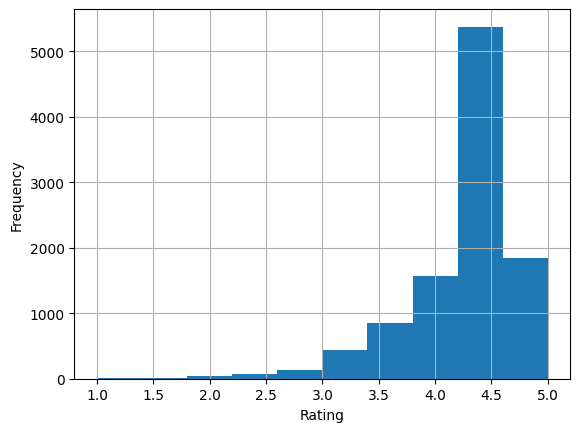

In [221]:
rating_copy["Rating"].hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

通过观察数据的统计数据和可视化，我们没有在评分数据中发现异常值。

### 特征2： Size

#### 查看特征信息

In [222]:
Size_copy = non_na_df.copy()
Size_copy["Size"].value_counts()

Varies with device    1525
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
902k                     1
818k                     1
143k                     1
847k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

#### 特征处理

size这个特征中，APP大小的单位不一致，且不是数值型的。因此我们首先需要统一单位，并将特征数据转换成数值型。

In [223]:
#定位单位为MB的数据
k_indices = Size_copy['Size'].loc[Size_copy['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(Size_copy.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
Size_copy.loc[k_indices,'Size'] = converter

In [224]:
Size_copy['Size'] = Size_copy['Size'].str.replace('M','')
#df_copy['Size'] = pd.to_numeric(df_copy['Size'])
Size_copy['Size'].head()

0     19
1     14
2    8.7
3     25
4    2.8
Name: Size, dtype: object

Size特征中，出现最多的是“Varies with device”，我们需要对这种非数值型的字符串进行处理。这里我们将“Varies with device”当做缺失值处理。

In [225]:
#将Varies with device转化为缺失值
Size_copy['Size'].replace("Varies with device", np.nan, inplace = True)

In [226]:
Size_copy['Size']=Size_copy['Size'].astype("float").apply(lambda x: round(x, 3))
Size_copy['Size'].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

### 问题3：对于Varies with device，我们应该哪种方式处理缺失值？



#根据各类别的均值填充数据
Size_copy['Size'].fillna(Size_copy.groupby('Category')['Size'].transform('mean'),inplace = True)

查找检查非数值数据

In [227]:
Size_copy.applymap(lambda x: isinstance(x,float))['Size'].value_counts()

True    10354
Name: Size, dtype: int64

数据全为数值型数据。接下来可以对数据进行异常值检测了。

#### 异常值检测

首先我们可以查看改特征的数值信息并绘制一下散点图，观察特征的数值。

In [228]:
Size_copy['Size'].describe()

count    8829.000000
mean       21.289052
std        22.542384
min         0.008000
25%         4.700000
50%        13.000000
75%        29.000000
max       100.000000
Name: Size, dtype: float64

c:\Users\AndrewYijiaLi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

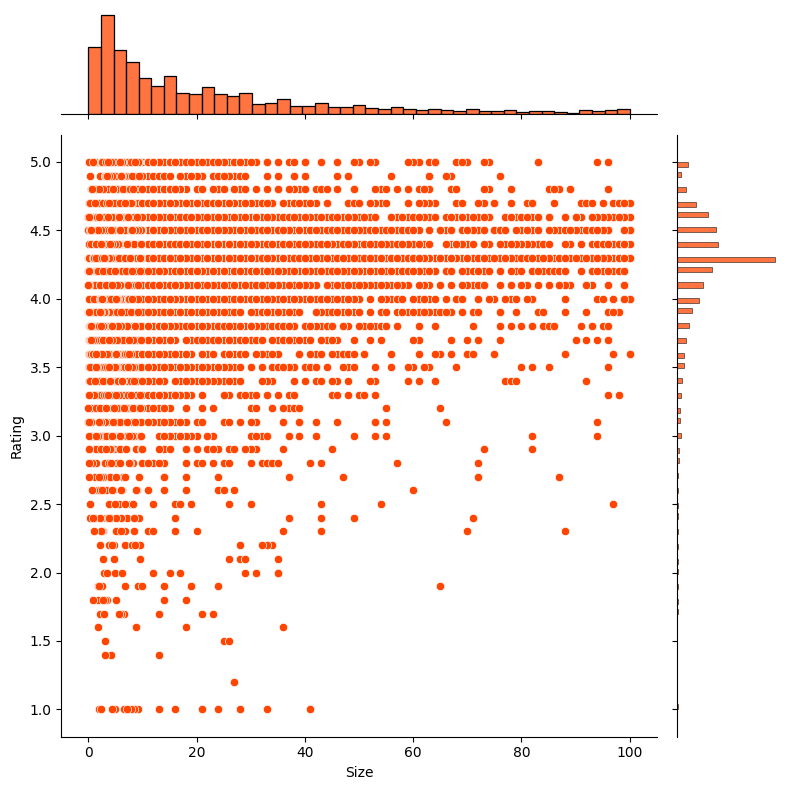

In [229]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=Size_copy, size = 8)

通过观察统计数据，发现数据的标准差很大。但是Size这个属性中，有很多APP的大小最大为1e9B，最小为1e6B。数值都在正常范围以内，且我们从散点图中，并未发现明显的异常值。因此这一特征我们认为是没有异常值。

In [230]:
Size_copy.to_csv('appstorev1.2.csv')

### 特征3：Price

#### 查看特征信息

In [231]:
price_copy = Size_copy.copy()
price_copy["Price"].value_counts()

0          9589
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$1.50         1
$14.00        1
$299.99       1
$37.99        1
$4.85         1
Name: Price, Length: 92, dtype: int64

数据中，包含非数值符号，需要删除。数据中，有92个不同的价格。

#### 特征处理

**删除非数值符号$。**

In [232]:
#用replace删除数值当中符号，并把特征中的数据类型转化为数值型。
price_copy["Price"]=price_copy["Price"].str.replace('$','').astype("float")
#price_copy["Price"].describe()
price_copy["Price"].value_counts().head(10)

C:\Users\AndrewYijiaLi\AppData\Local\Temp\ipykernel_47264\3846995972.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  price_copy["Price"]=price_copy["Price"].str.replace('$','').astype("float")


0.00    9589
0.99     146
2.99     125
1.99      73
4.99      70
3.99      60
1.49      46
5.99      27
2.49      25
9.99      19
Name: Price, dtype: int64

#### 异常值检测

查看统计数据。

In [233]:
price_copy["Price"].describe()

count    10354.000000
mean         1.031099
std         16.280974
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

从统计数据中我们发现，APP价格的动态范围在[0,400]之间，标准差为16.295。这里我们可以选择查看一下价格比较大APP，通过观察这些样本判断是否为异常值。

In [234]:
#查看价格大于350美金的样本
price_copy[price_copy["Price"]>300]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
3744,most expensive app (H),FAMILY,4.3,6,1.500,100+,Paid,399.99,Everyone,Entertainment
3907,💎 I'm rich,LIFESTYLE,3.8,718,26.000,"10,000+",Paid,399.99,Everyone,Lifestyle
3912,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,"10,000+",Paid,400.00,Everyone,Lifestyle
4894,I am rich,LIFESTYLE,3.8,3547,1.800,"100,000+",Paid,399.99,Everyone,Lifestyle
4897,I am Rich Plus,FAMILY,4.0,856,8.700,"10,000+",Paid,399.99,Everyone,Entertainment
4899,I Am Rich Premium,FINANCE,4.1,1867,4.700,"50,000+",Paid,399.99,Everyone,Finance
4900,I am extremely Rich,LIFESTYLE,2.9,41,2.900,"1,000+",Paid,379.99,Everyone,Lifestyle
4901,I am Rich!,FINANCE,3.8,93,22.000,"1,000+",Paid,399.99,Everyone,Finance
4902,I am rich(premium),FINANCE,3.5,472,0.942,"5,000+",Paid,399.99,Everyone,Finance
4905,I Am Rich Pro,FAMILY,4.4,201,2.700,"5,000+",Paid,399.99,Everyone,Entertainment


这些数据并没有明显异常。

数据可视化，绘制一下散点图，观察数据变换趋势。

<AxesSubplot:xlabel='Price', ylabel='Rating'>

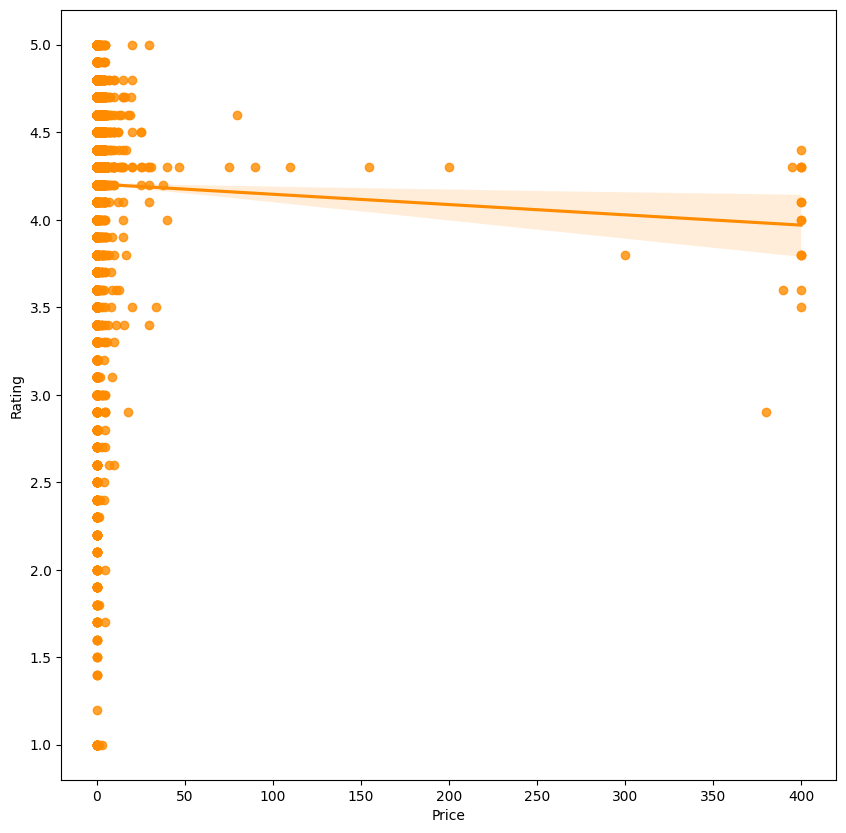

In [235]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data= price_copy)

从散点图我们可以看出，价格对评分的影响不大，但是如果APP价格设置的过高，会影响评分。

#### 保存文件

In [236]:
price_copy.to_csv('appstorev1.3.csv')

# 数据预处理 - 分类数据

# 实验介绍及步骤

    实验介绍：上一部分实验，我们完成了缺失值处理和包括Rating、Size、Price、Installs和Reviews在内的5个特征的异常值处理工作。这些都是数值属性的数据。接下来我们对分类属性的特征的处理工作，包括App、Category、Type、Content Rating和Genres。
    本次实验中，我们首先Content Rating为例，一起学习处理分类数据的过程。掌握了这些基本语法后，大家需要通过代码填空的方式自己动手实践处理数据。
    
    数据挖掘中，一些算法可以直接计算分类变量，比如决策树模型。但许多机器学习算法不能直接处理分类变量，它们的输入和输出都是数值型数据。因此，把分类变量转换成数值型数据是必要的，可以用独热编码 (One-Hot Encoding) 、哑编码 (Dummy Encoding)和label encoding实现。
   
    无序分类变量的离散化方法较为常用方法：独热编码 (One-Hot Encoding)。
    有序分类变量{低年级，中年级，高年级}，可以使用Label-Encoding直接离散化为{0,1,2}。

In [237]:
#导入相关库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [238]:
#数据读取
raw_df = pd.read_csv('appstorev1.3.csv',encoding="ISO-8859–1",index_col=0)
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity


## 特征6：Type

**第一步：查看特征信息及可视化。**

<AxesSubplot:>

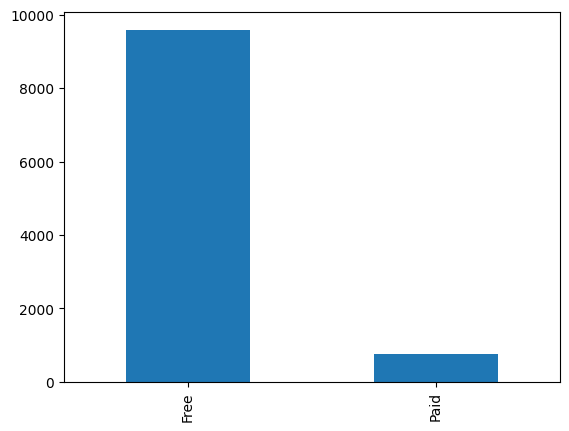

In [239]:
#查看特征的数值
raw_df['Type'].value_counts().plot(kind='bar')

**第二步 分类变量数值化**

Type数据只有两种可能数值，包括free和paid。因此我们可以用Label-Encoding将这一特征数据离散化。

In [240]:
#我们可以直接通过map实现分类变量的离散化
raw_df['Type'] = raw_df['Type'].map({'Free':1,"Paid":2})
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",1,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",1,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",1,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",1,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",1,0.0,Everyone,Art & Design;Creativity


## 特征7：Content Rating

**第一步：查看特征信息及可视化。**

In [241]:
#查看特征的数值
raw_df['Content Rating'].value_counts()

Everyone           8380
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

内容分级数据中，有2个样本没有分级。我们可以单独查看一下这两个样本，观察是否为缺失值。

In [242]:
raw_df[raw_df['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
6842,Best CG Photography,FAMILY,4.3,1,2.5,500+,1,0.0,Unrated,Entertainment
7794,DC Universe Online Map,TOOLS,4.1,1186,6.4,"50,000+",1,0.0,Unrated,Tools


可以看出数据的第一条数据只有一条评论，第二条数据却有1186条评论。因此我们可以将这两个没有分级的样本给删除。

In [243]:
raw_df = raw_df[raw_df['Content Rating'] !='Unrated']

In [244]:
#更新重置样本索引
raw_df.reset_index(drop= True,inplace = True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+')])

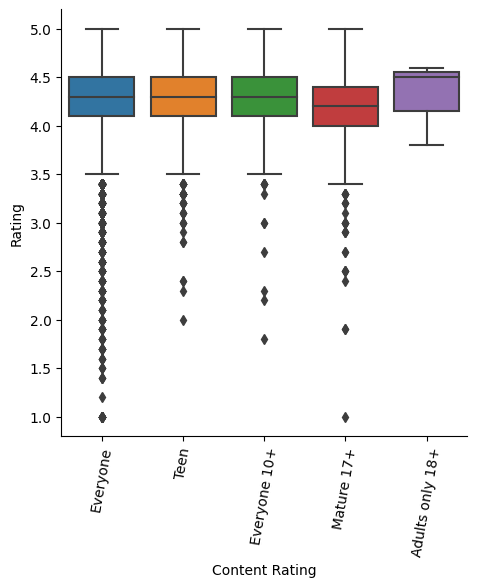

In [245]:
sns.catplot(x="Content Rating",y="Rating",data=raw_df, kind="box")
plt.xticks(rotation=80)

从箱型图中，每个内容分级的均值来看Adults only 18+的平均评分最高。Mature 17+的的平均评分最低。

**第二步 分类变量数值化**

内容分级这一特征五种取值不是完全独立的，根据限制的程度我们可以排序为Everyone，Everyone 10+，Teen，Mature 17+和Adults only 18。因此分级有高低是有序变量，这里用 LabelEncoder。

In [246]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#X = [['Everyone', 1], ['Teen', 2], ['Mature 17+',3]，['Everyone 10+', 4], ['Adults only 18+',5]]
#enc.fit(X)
raw_df['Content Rating'] = le.fit_transform(raw_df['Content Rating'])

#raw_df = pd.get_dummies(raw_df, columns= ["Content Rating"])

In [247]:
raw_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",1,0.0,1,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",1,0.0,1,Art & Design;Pretend Play
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",1,0.0,1,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",1,0.0,4,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",1,0.0,1,Art & Design;Creativity


## 特征8：Category

**第一步：查看特征信息及可视化。**

In [248]:
raw_df["Category"].value_counts()

FAMILY                 1941
GAME                   1121
TOOLS                   841
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                223
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

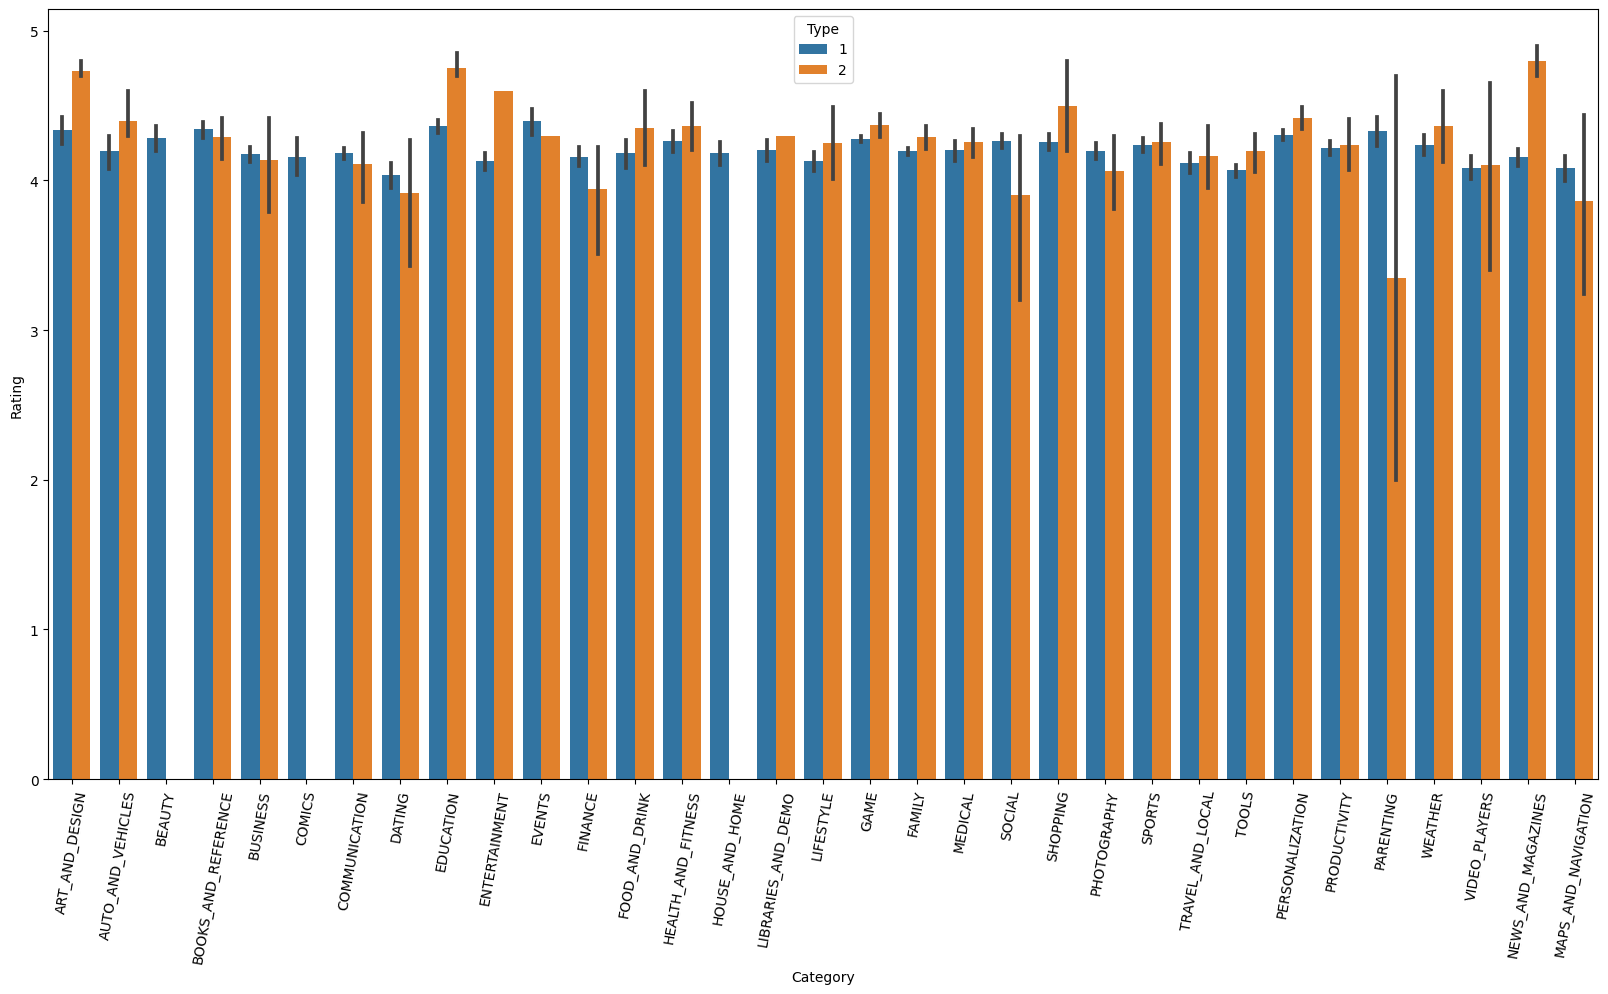

In [249]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Category", y="Rating",hue="Type", data=raw_df)
plt.xticks(rotation=80)

对于art_and_design、education、entertainment和news_and_magnizeszz这几类来说，收费的APP的均分比较高。对于social和parenting来说，APP费用很可能会带来不好的评分。beauty、comics和house_and_home这三个类别的所有APP都是免费的。

**第二步 分类变量数值化**

### 问题1：经过上面的学习，对类别进行数值离散化，使用哪个方法更合理呢？
    


代码：

In [250]:
#用get_dummies()将Category转换为数值数据。
raw_df = pd.get_dummies(raw_df, columns= ["Category"])

In [251]:
raw_df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_ART_AND_DESIGN,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,"10,000+",1,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14.0,"500,000+",1,0.0,1,Art & Design;Pretend Play,1,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",4.7,87510,8.7,"5,000,000+",1,0.0,1,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,"50,000,000+",1,0.0,4,Art & Design,1,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,"100,000+",1,0.0,1,Art & Design;Creativity,1,...,0,0,0,0,0,0,0,0,0,0


## 特征8：Genres

In [252]:
raw_df["Genres"].value_counts()

Tools                                  840
Entertainment                          587
Education                              527
Business                               427
Medical                                408
                                      ... 
Health & Fitness;Action & Adventure      1
Racing;Pretend Play                      1
Travel & Local;Action & Adventure        1
Role Playing;Education                   1
Strategy;Creativity                      1
Name: Genres, Length: 119, dtype: int64

从输出的类型数据我们可以看出，某些样本的类型数据，其实包含两个类型，比如Video Players & Editors;Creativity，Card;Action & Adventure和Books & Reference;Creativity 。分号前为主要的类型，分号后为次要的类型。有因Genres和Category这个特征表示的意思有重复的地方。这里我们只保留分号前的主要类型。

In [253]:
sep = ';'
raw_df['Genres']= raw_df['Genres'].apply(lambda x: x.split(sep)[0])
raw_df["Genres"].value_counts()

Tools                      841
Entertainment              627
Education                  610
Business                   427
Medical                    408
Productivity               407
Personalization            388
Lifestyle                  374
Action                     371
Sports                     368
Communication              367
Finance                    360
Photography                322
Health & Fitness           308
Social                     280
News & Magazines           264
Casual                     263
Travel & Local             237
Arcade                     234
Books & Reference          233
Shopping                   223
Simulation                 216
Dating                     196
Video Players & Editors    178
Puzzle                     162
Maps & Navigation          137
Food & Drink               124
Role Playing               120
Racing                     119
Strategy                   108
Educational                106
Adventure                   91
Librarie

**第二步 分类变量数值化**

In [254]:
#用get_dummies()将Category转换为数值数据。
#raw_df = pd.get_dummies(raw_df, columns= ["Genres"])
raw_df['Genres'] = le.fit_transform(raw_df['Genres'])

In [255]:
raw_df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_ART_AND_DESIGN,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,"10,000+",1,0.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14.0,"500,000+",1,0.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",4.7,87510,8.7,"5,000,000+",1,0.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,"50,000,000+",1,0.0,4,3,1,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,"100,000+",1,0.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0


这里APP的名字我们不做处理，直接删除。

In [256]:
raw_df = raw_df.drop(["App"],axis='columns')

In [257]:
#保存文件
raw_df.to_csv("AppDataV2.csv")